# Importing the required Liberaries

In [3]:
#data analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"C:\Users\harsh\The Sparks Foundation\Datasets for Tasks\Iris.csv") 
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Analyzing the Data

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum() #Checking for Null Values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Lets plot these two variables and visualize them**

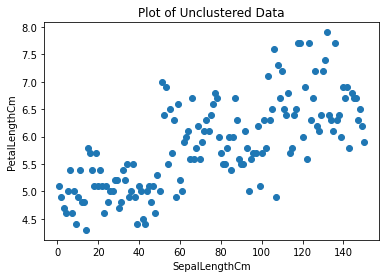

In [8]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.title('Plot of Unclustered Data')
plt.show()

**From above, you can see the unclustered data**

**K-means Clustering Algorithm** is a simple **unsupervised** machine learning algorithm.
The main objective of K-means clustering is to group similar data points together into a cluster.
It is used when we have unlabelled data.
The aim of this algorithm is to divide 'n' number of observations into 'k' number of clusters.  

**Implementing K-Means from Scratch**

**Step 1 :** Select the number of clusters you want to indentify i.e. the k.
 
**Step 2 :**Randomly select three different or distinct data points as centroids

**Step 3 :**Calculate Eudlidean Distance and assign each data-point to the closest cluster centroid.

**Step 4 :** Calculate the centroid of all the newly-formed clusters.

In [11]:
#Step-1
k = 3#Assuming the value of k to be 3
np.random.seed(40)

#Step-2
#Here, we are selecting three points randomly as centroids 
random_centroids=[]
for i in range(1,k+1):
  random_centroids.append([np.random.randint(1,100), np.random.randint(1,100)])#Here, we have selecting the random values between 1 and 100 because most of of our values lie in this range
print('Randomly selected points as random_centroids:',random_centroids)

Randomly selected points as random_centroids: [[71, 92], [8, 38], [57, 51]]


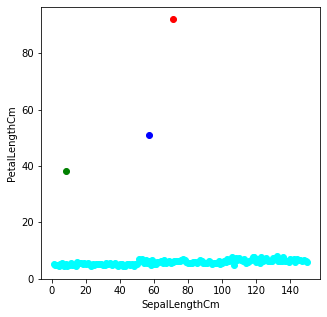

In [12]:
#Here, we are plotting the random_centroids that we selected previously
plt.figure(figsize=(5, 5))
plt.scatter(df.iloc[:,0], df.iloc[:,1], color='cyan')
length = len(random_centroids)
colors1=['r','g','b','cyan','yellow','black']
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.show()

In [15]:
#Step-3

#Here, we are calculating the distance between the datapoints and our centroids and assigning each data-point to the closest cluster
def assignment(df, random_centroids):

  for i in range(length) :
    df['Distance from Centroid {}'.format(i)]=(np.sqrt((df.iloc[:,0] - random_centroids[i][0]) ** 2 + (df.iloc[:,1] - random_centroids[i][1]) ** 2))
   
  list1=[]
  list2=[]
  for a,b,c in zip(df['Distance from Centroid 0'],df['Distance from Centroid 1'],df['Distance from Centroid 2']):
    d = min(a,b,c)
   
    if d == a:
      list1.append(0)
      list2.append('r')
    elif d == b:
      list1.append(1)
      list2.append('g')
    else:
      list1.append(2)
      list2.append('b')
  df['Closest_Centroid'] = list1
  df['Color']=list2
  return df 

In [16]:
df_new = assignment(df, random_centroids)
df_new.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Distance from Centroid 0,Distance from Centroid 1,Distance from Centroid 2,Closest_Centroid,Color
0,1,5.1,3.5,1.4,0.2,Iris-setosa,111.586782,33.636439,72.407251,1,g
1,2,4.9,3.0,1.4,0.2,Iris-setosa,111.118900,33.639411,71.764964,1,g
2,3,4.7,3.2,1.3,0.2,Iris-setosa,110.658438,33.673283,71.131498,1,g
3,4,4.6,3.1,1.5,0.2,Iris-setosa,110.126110,33.638668,70.441181,1,g
4,5,5.0,3.6,1.4,0.2,Iris-setosa,109.201648,33.136083,69.426220,1,g


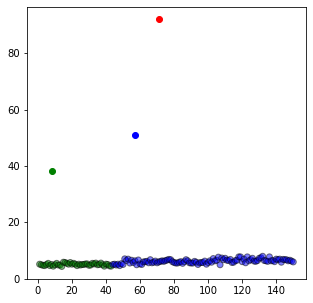

In [17]:
#Plotting the clusters
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],color =df_new['Color'],alpha = 0.5,edgecolor = 'k')
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])

In [21]:
#Step-4

#Update Stage
#In this satge, we are updating the centroids of the newly formed clusters
def update(parameter):
    for i in range(length):
        random_centroids[i][0] = np.mean(df_new[df_new['Closest_Centroid'] == i]['SepalLengthCm'])
        random_centroids[i][1] = np.mean(df_new[df_new['Closest_Centroid'] == i]['PetalLengthCm'])
    return parameter

In [22]:
random_centroids = update(random_centroids)
random_centroids

[[nan, nan],
 [5.009302325581395, 1.4511627906976743],
 [6.178504672897195, 4.6859813084112165]]

**Implementing K-Means using scikit learn**

In [24]:
df = df_new[["SepalLengthCm","PetalLengthCm"]]
df.head()

,SepalLengthCm,PetalLengthCm
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [25]:
#Here, we are assuming the value of k as 5
kmeans = KMeans(n_clusters=3)#Creating a K-Means Object
kmeans.fit(df)#Fitting the Model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
#Here, we are generating Labels of each point
labels = kmeans.predict(df)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [27]:
#printing the centroids of each cluster
centroids = kmeans.cluster_centers_
centroids

array([[6.83902439, 5.67804878],
       [5.00784314, 1.49411765],
       [5.87413793, 4.39310345]])

In [28]:
#Sum of squared distances of data-points to their closest cluster center. It tells us how well the formed clusters are
kmeans.inertia_

53.801351193126536

**Let's visualize the Clustered Data**

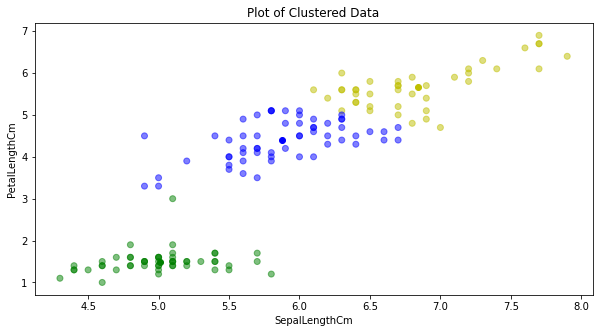

In [29]:
plt.figure(figsize=(10, 5))
colmap = {1:'y',2:'g',3:'b',4:'r',5:'c'}
colors = map(lambda x: colmap[x+1], labels)
print(colors)
colors1=list(colors)

plt.scatter(df['SepalLengthCm'], df['PetalLengthCm'], color=colors1, alpha=0.5)
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.title('Plot of Clustered Data')
plt.show()

In [31]:
# Elbow Method
inertia_list = []
for num_clusters in np.arange(1, 21):
    kmeans =KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)

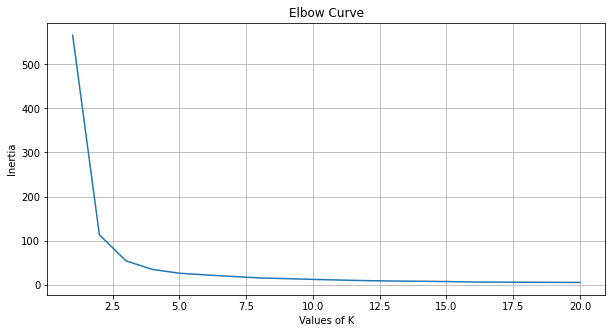

In [32]:
#Plotting the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), inertia_list)
plt.grid(True)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

**From above, we select the optimum value of k by determining the Elbow Point - a point after which the inertia starts decreasing linearly. In this case, we can select the value of k as 10.**

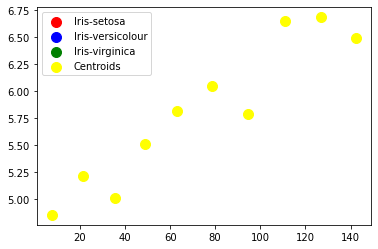

In [37]:
# Visualising the clusters - On the first two columns
plt.scatter(x[kmeans == 0, 0], x[kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[kmeans == 1, 0], x[kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[kmeans == 2, 0], x[kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()